In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

## Read data

In [2]:
df = pd.read_csv('FINAL_USO.csv', parse_dates = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

## data visulization

In [5]:
label_name = list(df.columns)
close_value = []
for i in range(len(label_name)):
    if str.lower(label_name[i].replace(" ", "")[-6:]) == 'jclose' or str.lower(label_name[i].replace("_", "")[-6:]) == 'jclose':
        close_value.append(label_name[i])
        
del close_value[2]
close_value

['Adj Close',
 'SP_Ajclose',
 'DJ_Ajclose',
 'EG_Ajclose',
 'GDX_Adj Close',
 'USO_Adj Close']

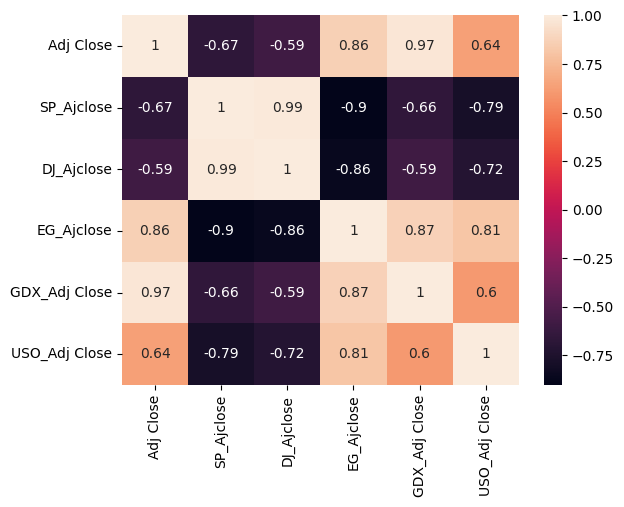

In [6]:
close_data = pd.DataFrame(df, columns = close_value)
correlation_mat = close_data.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [7]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Adj Close'])])
fig.show()

In [8]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

In [9]:
fig = px.line(df, x="Date", y=['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
              title='Adj close')
fig.show()

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()
fig = px.scatter(df, x="Date", y="Daily Return", title="Daily Return")
fig.show()

In [11]:
fig = px.histogram(df, x="Date", y="Daily Return", histfunc="avg", title="Daily Return")
fig.show()

In [12]:
fig = px.line(df, x="Date", y=['Volume'],
              title='Volume')
fig.show()

In [13]:
volumn_max = max(df['Volume'])
index = df[df['Volume']==volumn_max].index.values[0]
print("Max Volume's day is:", df['Date'][index],"\n""volume:", df['Volume'][index],'\nthe day of close price:', df['Adj Close'][index])
print('Average Adj close:', df["Adj Close"].mean())

Max Volume's day is: 2013-04-15 
volume: 93804200 
the day of close price: 131.309998
Average Adj close: 127.31948200349244


In [14]:
Close_Value = ['Adj Close', 'SP_Ajclose', 'DJ_Ajclose', 'EG_Ajclose', 'GDX_Adj Close','USO_Adj Close']
X = df.loc[:,Close_Value]
Y = X[['Adj Close']]
X.drop('Adj Close', axis=1, inplace=True)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

/tmp/ipykernel_86/1829984720.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

R squared error :  0.9938511648990556


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ded26cf2-6c15-4800-bf93-f0f727d3f394' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>